In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
bmi = df['weight'] / (df['height'] /100) ** 2

for i,value in enumerate(bmi):
  if value > 25:
    bmi[i] = 1
  else:
    bmi[i] = 0

df['overweight'] = bmi.astype(np.int8())

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.cholesterol.replace({1: 0, 2: 1, 3: 1}, inplace=True)
df.gluc.replace({1: 0, 2: 1, 3: 1}, inplace=True)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.melt(id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco','active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    cardio_split = pd.DataFrame(df_cat[['cardio','variable', 'value']].groupby('cardio').value_counts())
    cardio_split.reset_index(inplace=True)
    cardio_split.columns = ['cardio', 'variable', 'value', 'total']
    cardio_split.sort_values('variable', inplace=True)
    # Draw the catplot with 'sns.catplot()'

    # Get the figure for the output
    graph = sns.catplot(data= cardio_split, col ='cardio', x= 'variable', y='total', hue='value', kind = 'bar')
    fig = graph.fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data

    df_heat = df.drop(index=df.loc[df['ap_lo'] > df['ap_hi']].index.append(df.loc[df['height'] < df['height'].quantile(0.025)].index).append(df.loc[df['height'] > df['height'].quantile(0.975)].index).append(df.loc[df['weight'] < df['weight'].quantile(0.025)].index).append(df.loc[df['weight'] > df['weight'].quantile(0.975)].index))

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr))
   

    # Set up the matplotlib figure
    fig, ax = plt.subplots()
    # Draw the heatmap with 'sns.heatmap()'
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.heatmap(corr, mask=mask, annot=True, annot_kws={'size': 10}, fmt='.1f')

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

C:\Users\Desktop\AppData\Local\Temp\ipykernel_10728\4038333072.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.cholesterol.replace({1: 0, 2: 1, 3: 1}, inplace=True)
C:\Users\Desktop\AppData\Local\Temp\ipykernel_10728\4038333072.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Figure(1063.5x500)


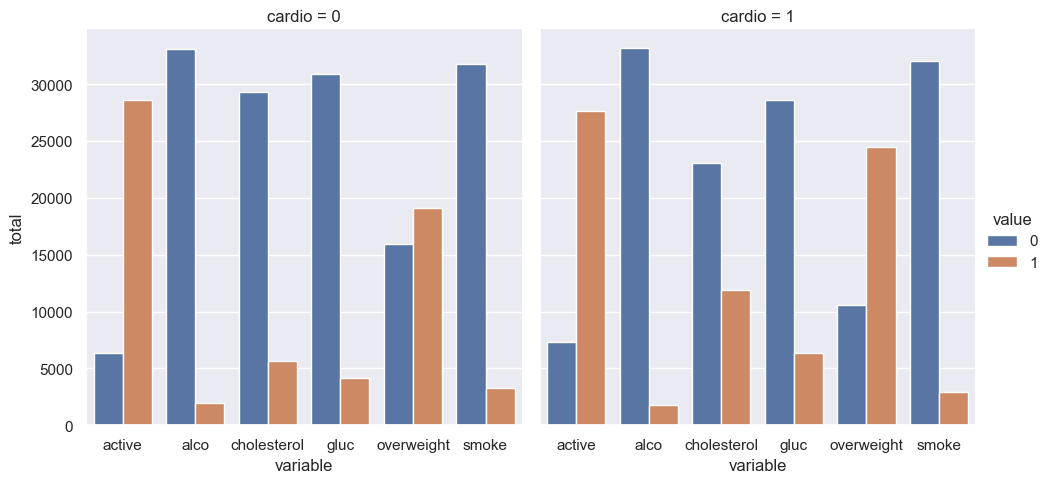

In [3]:
print(draw_cat_plot())

Figure(1500x800)


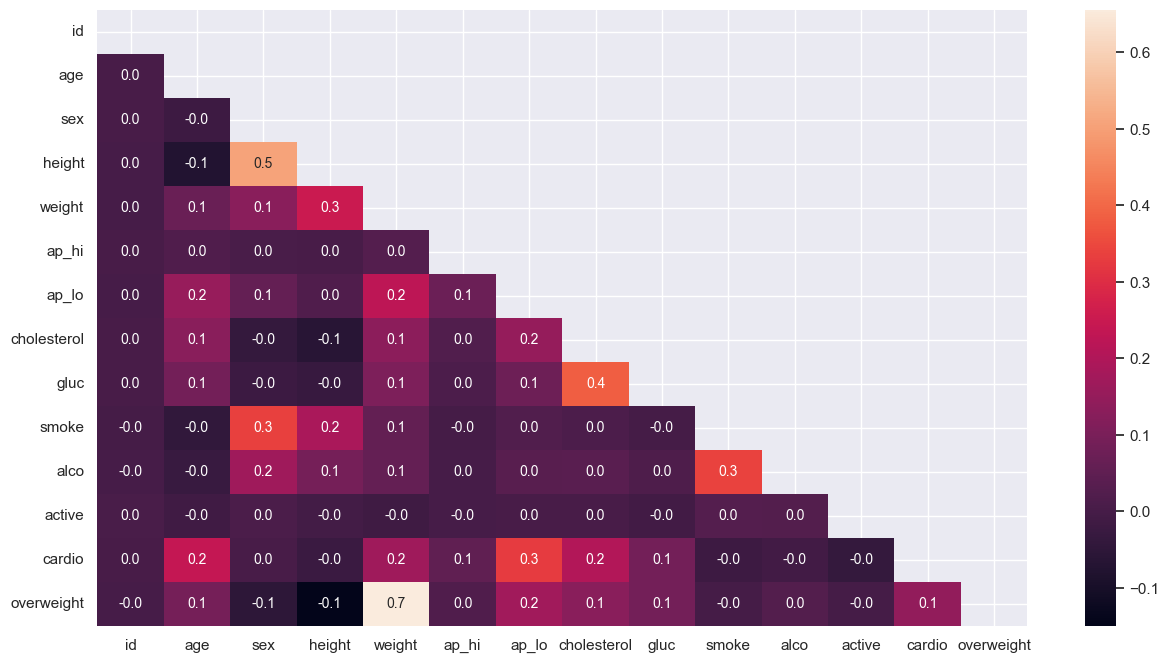

In [4]:
print(draw_heat_map())